In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit

# 2GHz modulation 3054MSPS

In [77]:
with open('../data/Peakdata_2GHz.pkl','rb') as file:
    peak= pickle.load(file)

In [23]:
def makehist(ch,string,bin,A,mu):
    
    data = np.concatenate(peak[ch][string])
    hist, bin_edges = np.histogram(data, bins=bin)
    
    # ヒストグラムの中心点を計算
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # ガウシアンフィット用の関数（正規分布関数）
    def gaussian(x, A, mu, sigma):
        return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    
    # フィットの初期値を設定
    initial_guess = [A, mu, 20]  # A, mu, sigma
    
    # ガウシアンフィットを実行
    params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)

    A,mu, sigma = params
    # フィット結果をプロット
    plt.bar(bin_centers, hist, width=bin_centers[1] - bin_centers[0], color='b', label='Histogram')
    plt.plot(bin_centers, gaussian(bin_centers, *params), 'r-', label='Fit: mu={:.2f}, sigma={:.2f}'.format(mu, abs(sigma)))
    legend=plt.legend()
    legend.get_frame().set_alpha(0.5)
    plt.xlabel('Peak Value')
    # フィット結果のパラメータを表示
    print(f"Amplitude (A): {params[0]}")
    print(f"Mean (mu): {params[1]}")
    print(f"Standard Deviation (sigma): {params[2]}")
    
    # プロットを表示
    plt.show()


Amplitude (A): 1846.9016203724893
Mean (mu): 2079.108327144359
Standard Deviation (sigma): -23.15931578874083


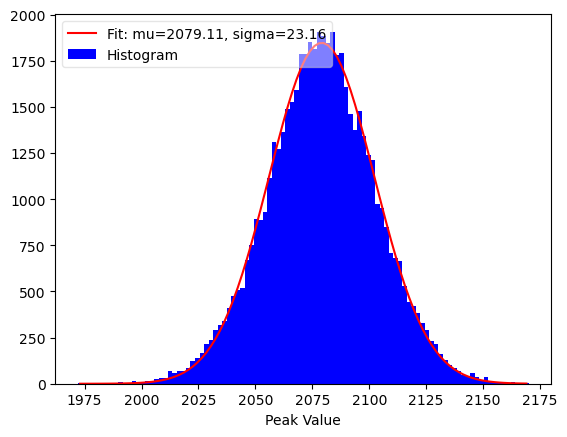

In [26]:
makehist(2,'15000',100,4000,2000)

In [6]:
def analysis(data):
    mean=np.mean(data)
    stdv=np.std(data)
    data=data[(data>mean-7*stdv) & (data<mean+7*stdv)]
    
    mean=np.mean(data)
    stdv=np.std(data)
    max_value = np.max(data)
    scaled_data = data / max_value
    rms = max_value*np.sqrt(np.mean(scaled_data ** 2))
    return mean, rms, stdv

In [19]:
mean=[]
rms=[]
std=[]
for i in range(4):
    m=[]
    r=[]
    s=[]
    for j in range(32):
        string=str((j+1)*1000)
        m.append(analysis(np.concatenate(peak[i][string][1:]))[0])
        r.append(analysis(np.concatenate(peak[i][string][1:]))[1])
        s.append(analysis(np.concatenate(peak[i][string][1:]))[2])
    mean.append(m)
    rms.append(r)
    std.append(s)

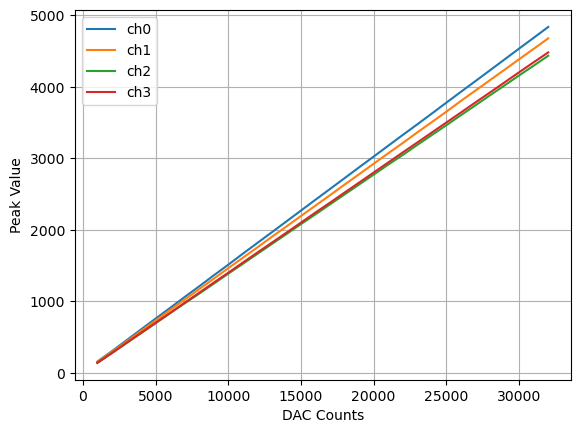

In [31]:
x=np.arange(1,33)*1000
plt.plot(x,mean[0],label='ch0')
plt.plot(x,mean[1],label='ch1')
plt.plot(x,mean[2],label='ch2')
plt.plot(x,mean[3],label='ch3')
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak Value')
#plt.savefig('mean.png',dpi=150)
plt.show()

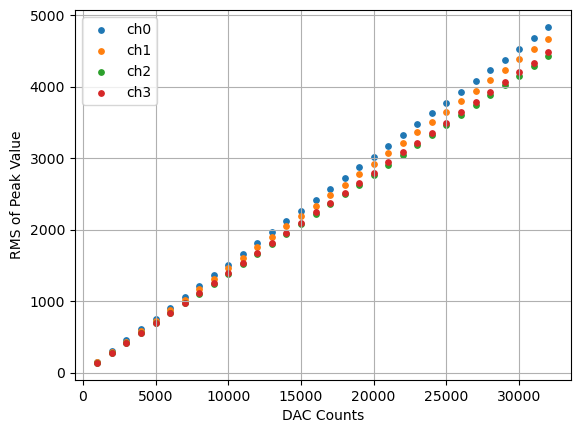

In [16]:
x=np.arange(1,33)*1000
plt.scatter(x,rms[0],label='ch0',s=15)
plt.scatter(x,rms[1],label='ch1',s=15)
plt.scatter(x,rms[2],label='ch2',s=15)
plt.scatter(x,rms[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('RMS of Peak Value')
#plt.savefig('rms.png',dpi=150)
plt.show()

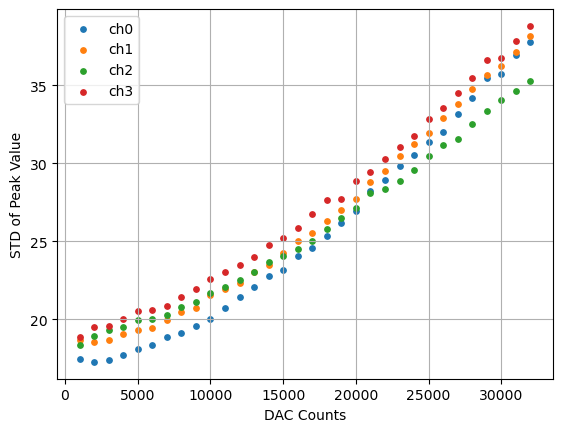

In [32]:
x=np.arange(1,33)*1000
plt.scatter(x,std[0],label='ch0',s=15)
plt.scatter(x,std[1],label='ch1',s=15)
plt.scatter(x,std[2],label='ch2',s=15)
plt.scatter(x,std[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('STD of Peak Value')
#plt.savefig('std.png',dpi=150)
plt.show()

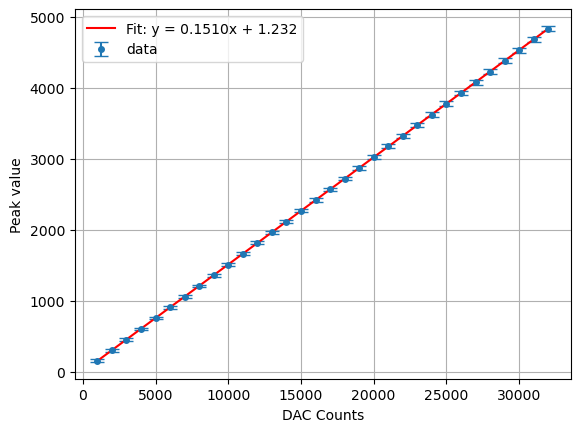

In [79]:
y=mean[0]
y_err=std[0]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch0.png',dpi=150)
plt.show()

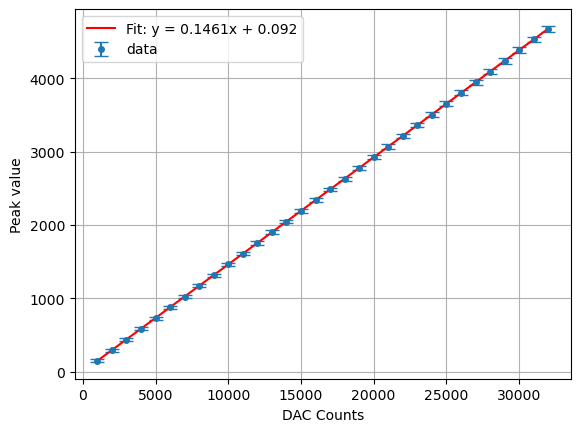

In [80]:
y=mean[1]
y_err=std[1]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch1.png',dpi=150)
plt.show()

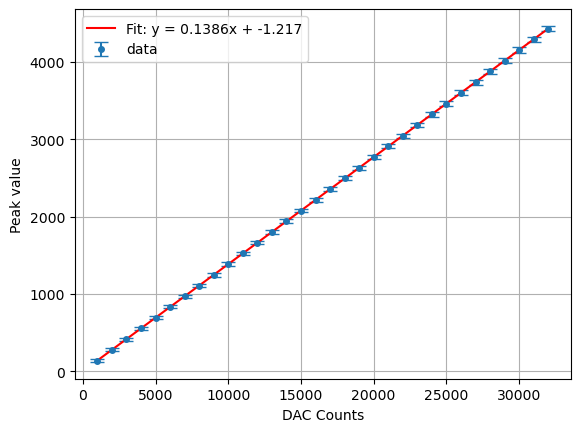

In [81]:
y=mean[2]
y_err=std[2]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch2.png',dpi=150)
plt.show()

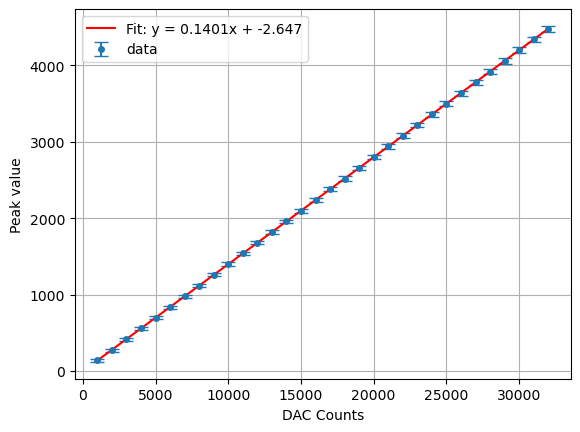

In [82]:
y=mean[3]
y_err=std[3]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch3.png',dpi=150)
plt.show()

# 1GHz modulation 3054MSPS

In [145]:
with open('../data/Peakdata_1GHz_3054MSPS.pkl','rb') as file:
    peak= pickle.load(file)

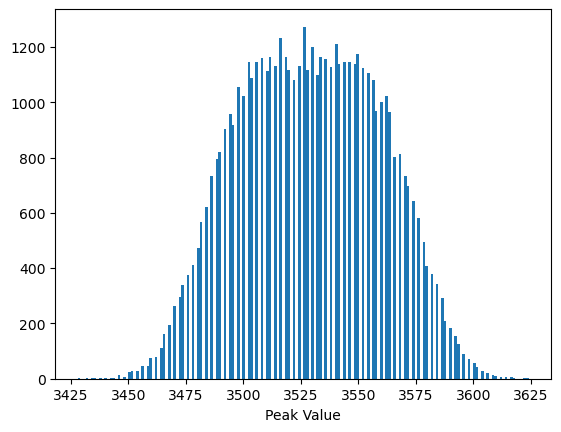

In [146]:
plt.hist(np.concatenate(peak[0]['23000']),bins=170)
plt.xlabel('Peak Value')
plt.show()

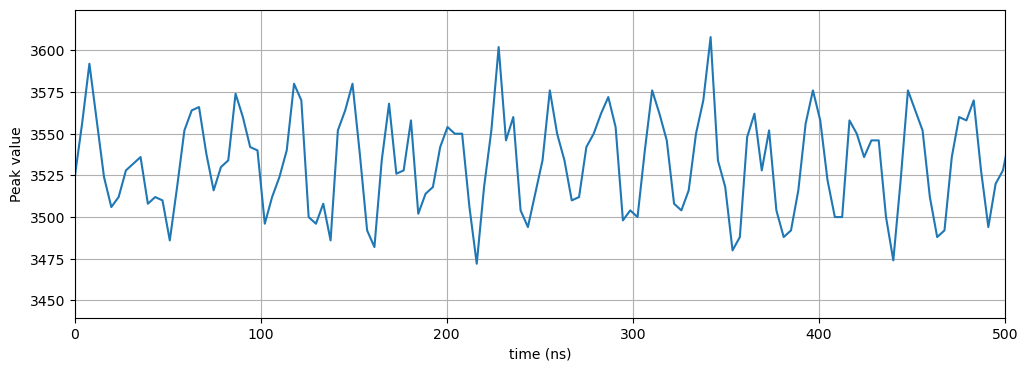

In [147]:
x=np.arange(len(peak[0]['23000'][0]))*1000/254.5
plt.figure(figsize=(12,4))
plt.plot(x,peak[0]['23000'][0])
plt.grid()
plt.xlabel('time (ns)')
plt.ylabel('Peak value')
plt.xlim(0,500)
plt.show()

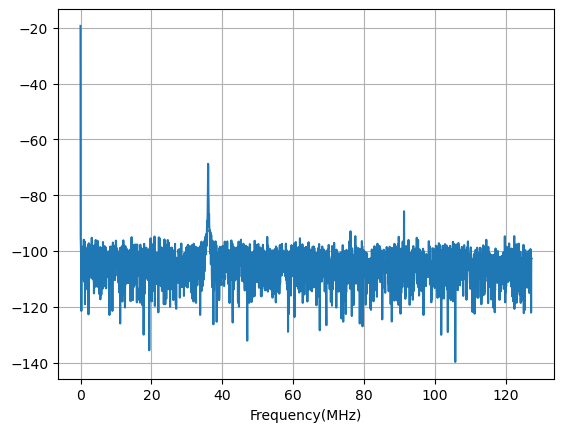

In [148]:
#FFT
waveform=peak[0]['23000'][0]
size    = len(waveform) # Number of data points in the file
timeBin = 1000/254.5 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:30000],mag[0:30000])
plt.xlabel("Frequency(MHz)")

plt.grid()